In [1]:
import sys; sys.path.append('/home/clair/wwa'); from wwa import *

cproj = cartopy.crs.PlateCarree()

# define study region
xn, xx, yn, yx = [24.5,26.5,40.5,41.5]

---
# **Fire activity**

Thermal anomaly data from https://firms.modaps.eosdis.nasa.gov/active_fire/  
EFFIS summaries with confidence intervals from https://effis.jrc.ec.europa.eu/apps/effis.statistics/seasonaltrend

## **Maps of thermal anomalies**

### **Greece**

#### **2023**

In [133]:
px = {k : get_latlon(k) for k in ["Athens", "Alexandroupoli", "Rhodes"]}

modis = pd.concat([pd.read_csv(fnm, parse_dates = ["acq_date"]) for fnm in glob.glob("data/modis_GRC_*.csv")])
modis["y"] = [d.year for d in modis.acq_date]
modis = gpd.GeoDataFrame(modis, geometry = gpd.points_from_xy(x=modis.longitude, y=modis.latitude), crs = "EPSG:4326")

viirs = pd.concat([pd.read_csv(fnm, parse_dates = ["acq_date"]) for fnm in glob.glob("data/viirs_GRC_*.csv")])
viirs["y"] = [d.year for d in viirs.acq_date]
viirs = gpd.GeoDataFrame(viirs, geometry = gpd.points_from_xy(x=viirs.longitude, y=viirs.latitude), crs = "EPSG:4326")

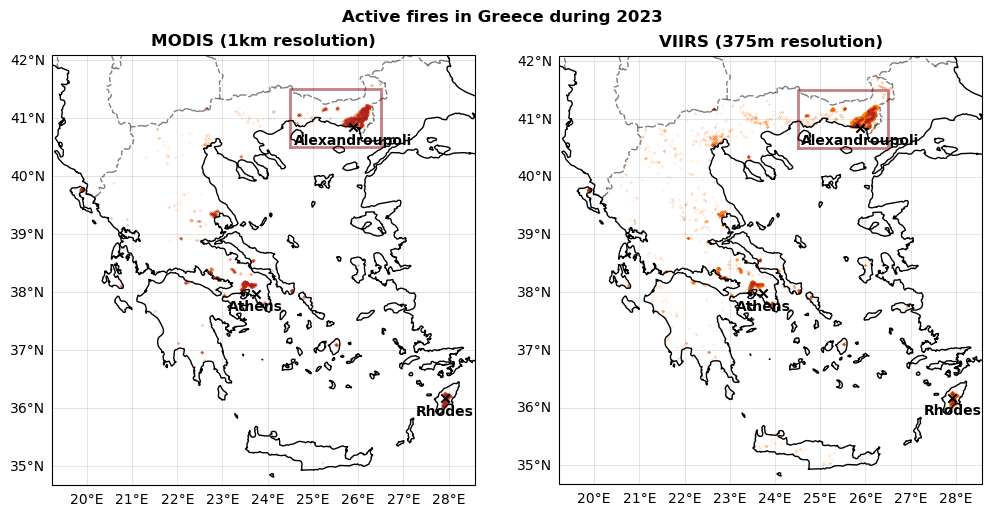

In [4]:
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (12,6), dpi = 100, subplot_kw = {"projection" : cproj}, sharex = True, sharey = True)

modis.loc[(modis.y == 2023) & (modis.confidence >= 60)].plot(ax = axs[0], marker = ".", color = "tab:orange", alpha = 0.7, markersize = 0.1)
modis.loc[(modis.y == 2023) & (modis.confidence >= 80)].plot(ax = axs[0], marker = ".", color = "firebrick", alpha = 0.7, markersize = 0.1)
axs[0].set_title("MODIS (1km resolution)", fontweight = "bold")

viirs.loc[(viirs.y == 2023) & (viirs.confidence == "n")].plot(ax = axs[1], marker = ".", color = "tab:orange", alpha = 0.7, markersize = 0.1)
viirs.loc[(viirs.y == 2023) & (viirs.confidence == "h")].plot(ax = axs[1], marker = ".", color = "firebrick", alpha = 0.7, markersize = 0.1)
axs[1].set_title("VIIRS (375m resolution)", fontweight = "bold")


for ax in fig.axes:
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, alpha = 0.5, ls = "--")
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom", "left"], xlocs = range(19,29))
    [ax.scatter(v["lon"], v["lat"], marker = "x", color = "k") for v in px.values()]
    [ax.annotate(k, xy = v.values(), fontweight = "bold", textcoords="offset points", xytext=(0,-12), ha='center') for k, v in px.items()]
    
    ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "darkred", lw = 2, alpha = 0.5)
    
plt.suptitle("Active fires in Greece during 2023", fontweight = "bold", y = 0.93)
plt.savefig("fig/active-fires-2023-greece.png")

#### **2007**

In [481]:
px = {k : get_latlon(k) for k in ["Athens", "Alexandroupoli", "Rhodes"]}

modis = pd.concat([pd.read_csv(fnm, parse_dates = ["acq_date"]) for fnm in glob.glob("data/modis_GRC_*.csv")])
modis["y"] = [d.year for d in modis.acq_date]
modis = gpd.GeoDataFrame(modis, geometry = gpd.points_from_xy(x=modis.longitude, y=modis.latitude), crs = "EPSG:4326")

viirs = pd.concat([pd.read_csv(fnm, parse_dates = ["acq_date"]) for fnm in glob.glob("data/viirs_GRC_*.csv")])
viirs["y"] = [d.year for d in viirs.acq_date]
viirs = gpd.GeoDataFrame(viirs, geometry = gpd.points_from_xy(x=viirs.longitude, y=viirs.latitude), crs = "EPSG:4326")

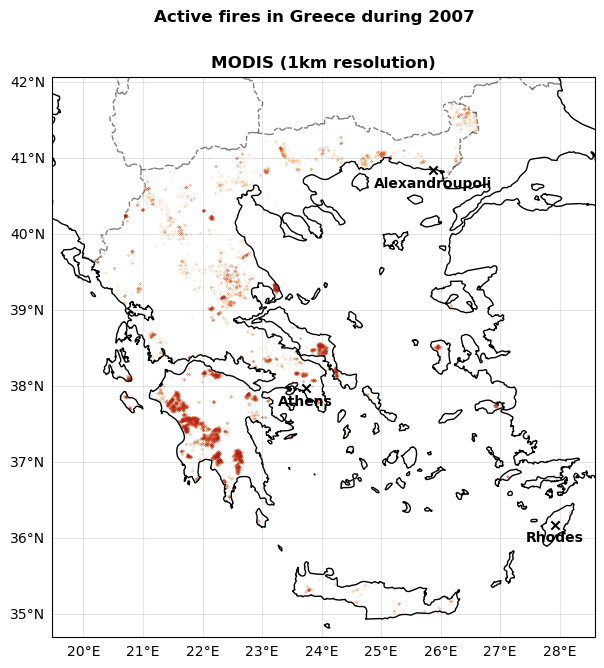

In [485]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (7,8), dpi = 100, subplot_kw = {"projection" : cproj}, sharex = True, sharey = True)

modis.loc[(modis.y == 2007) & (modis.confidence >= 60)].plot(ax = ax, marker = ".", color = "tab:orange", alpha = 0.7, markersize = 0.1)
modis.loc[(modis.y == 2007) & (modis.confidence >= 80)].plot(ax = ax, marker = ".", color = "firebrick", alpha = 0.7, markersize = 0.1)
ax.set_title("MODIS (1km resolution)", fontweight = "bold")

# viirs.loc[(viirs.y == 2007) & (viirs.confidence == "n")].plot(ax = axs[1], marker = ".", color = "tab:orange", alpha = 0.7, markersize = 0.1)
# viirs.loc[(viirs.y == 2007) & (viirs.confidence == "h")].plot(ax = axs[1], marker = ".", color = "firebrick", alpha = 0.7, markersize = 0.1)
# axs[1].set_title("VIIRS (375m resolution)", fontweight = "bold")

for ax in fig.axes:
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, alpha = 0.5, ls = "--")
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom", "left"], xlocs = range(19,29))
    [ax.scatter(v["lon"], v["lat"], marker = "x", color = "k") for v in px.values()]
    [ax.annotate(k, xy = v.values(), fontweight = "bold", textcoords="offset points", xytext=(0,-12), ha='center') for k, v in px.items()]
    
plt.suptitle("Active fires in Greece during 2007", fontweight = "bold", y = 0.93)
plt.savefig("fig/active-fires-2007-greece.png")

### **Turkey**

In [331]:
px = {k : get_latlon(k) for k in ["Ankara", "Istanbul", "Gaziantep"]}

modis = pd.concat([pd.read_csv(fnm, parse_dates = ["acq_date"]) for fnm in glob.glob("data/modis_TRK_*.csv")])
modis["y"] = [d.year for d in modis.acq_date]
modis = gpd.GeoDataFrame(modis, geometry = gpd.points_from_xy(x=modis.longitude, y=modis.latitude), crs = "EPSG:4326")

viirs = pd.concat([pd.read_csv(fnm, parse_dates = ["acq_date"]) for fnm in glob.glob("data/viirs_TRK_*.csv")])
viirs["y"] = [d.year for d in viirs.acq_date]
viirs = gpd.GeoDataFrame(viirs, geometry = gpd.points_from_xy(x=viirs.longitude, y=viirs.latitude), crs = "EPSG:4326")

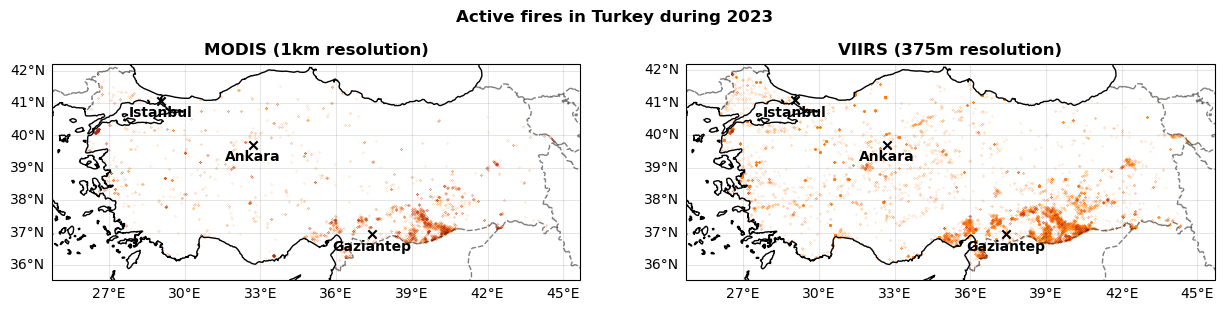

In [333]:
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (15,4), dpi = 100, subplot_kw = {"projection" : cproj}, sharex = True, sharey = True)

modis.loc[(modis.y == 2023) & (modis.confidence >= 60)].plot(ax = axs[0], marker = ".", color = "tab:orange", alpha = 0.7, markersize = 0.1)
modis.loc[(modis.y == 2023) & (modis.confidence >= 80)].plot(ax = axs[0], marker = ".", color = "firebrick", alpha = 0.7, markersize = 0.1)
axs[0].set_title("MODIS (1km resolution)", fontweight = "bold")

viirs.loc[(viirs.y == 2023) & (viirs.confidence == "n")].plot(ax = axs[1], marker = ".", color = "tab:orange", alpha = 0.7, markersize = 0.1)
viirs.loc[(viirs.y == 2023) & (viirs.confidence == "h")].plot(ax = axs[1], marker = ".", color = "firebrick", alpha = 0.7, markersize = 0.1)
axs[1].set_title("VIIRS (375m resolution)", fontweight = "bold")

for ax in fig.axes:
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS, alpha = 0.5, ls = "--")
    ax.gridlines(color = "k", alpha = 0.1, draw_labels = ["bottom", "left"])
    [ax.scatter(v["lon"], v["lat"], marker = "x", color = "k") for v in px.values()]
    [ax.annotate(k, xy = v.values(), fontweight = "bold", textcoords="offset points", xytext=(0,-12), ha='center') for k, v in px.items()]
    
plt.suptitle("Active fires in Turkey during 2023", fontweight = "bold", y = 0.9)
plt.savefig("fig/active-fires-2023-turkey.png")

## **Total fire activity over Greece**

In [459]:
modis = pd.concat([pd.read_csv(fnm, parse_dates = ["acq_date"], index_col = "acq_date") for fnm in glob.glob("data/modis_GRC_*.csv")])
modis["i"] = 1

In [444]:
days = pd.date_range(start = "2020-01-01", end = "2020-12-31")
labelticks = [i+1 for i in range(366) if (days[i].day) == 15]
labels = [days[i].strftime("%b") for i in range(366) if (days[i].day) == 1]

Text(0.5, 1.0, 'MODIS cumulative thermal anomalies (2001-2023)')

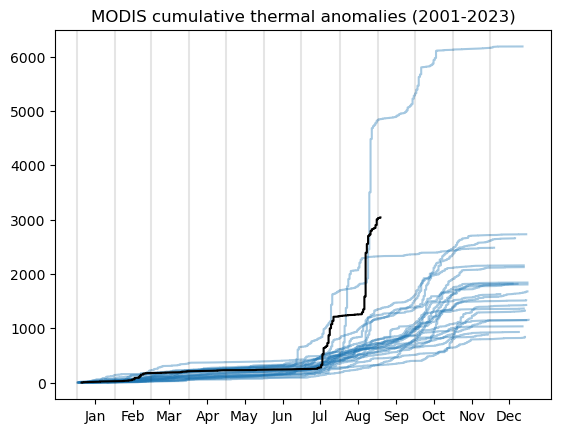

In [480]:
for y in range(2001,2023):
    plt.plot(modis.loc[str(y)].index.dayofyear, modis.loc[str(y), ["i"]].cumsum(), color = "tab:blue", alpha = 0.4)
y = 2023
plt.plot(modis.loc[str(y)].index.dayofyear, modis.loc[str(y), ["i"]].cumsum(), color = "k", alpha = 1)

ax = plt.gca()
ax.set_xticks(labelticks)
ax.set_xticklabels(labels)
[ax.axvline(i, color = "k", alpha = 0.1) for i in range(366) if (days[i].day) == 1]
ax.set_title("MODIS cumulative thermal anomalies (2001-2023)")

# that huge spike is 2007

## **Check against EFFIS**

In [198]:
# load EFFIS cumulative data
emi = pd.read_csv("data/effis_emissions_emicum_GRC_2003_2022_2023.csv", skiprows = 1, index_col = 0, names = ["max", "mean", "min", "2023"])
ba = pd.read_csv("data/effis_seasonal-trend_bacum_GRC_2006_2022_2023.csv", skiprows = 1, index_col = 0, names = ["max", "mean", "min", "2023"])
tam = pd.read_csv("data/effis_seasonal-trend_tacum-modis_GRC_2012_2022_2023.csv", skiprows = 1, index_col = 0, names = ["max", "mean", "min", "2023"])
tav = pd.read_csv("data/effis_seasonal-trend_tacum-viirs_GRC_2012_2022_2023.csv", skiprows = 1, index_col = 0, names = ["max", "mean", "min", "2023"])

# convert index to datetime for neater plotting
emi, ba, tam, tav = [df.set_index(pd.date_range(start = "2023-01-07", end = "2023-12-30", freq = "7D")) for df in [emi, ba, tam, tav]]

# add first day of year with cumulative values of zero (otherwise plots start a week in)
emi, ba, tam, tav = [pd.concat([pd.DataFrame({k : 0 for  k in ["max", "mean", "min", "2023"]}, index = pd.DatetimeIndex(["2023-01-01"])), df]) for df in [emi, ba, tam, tav]]

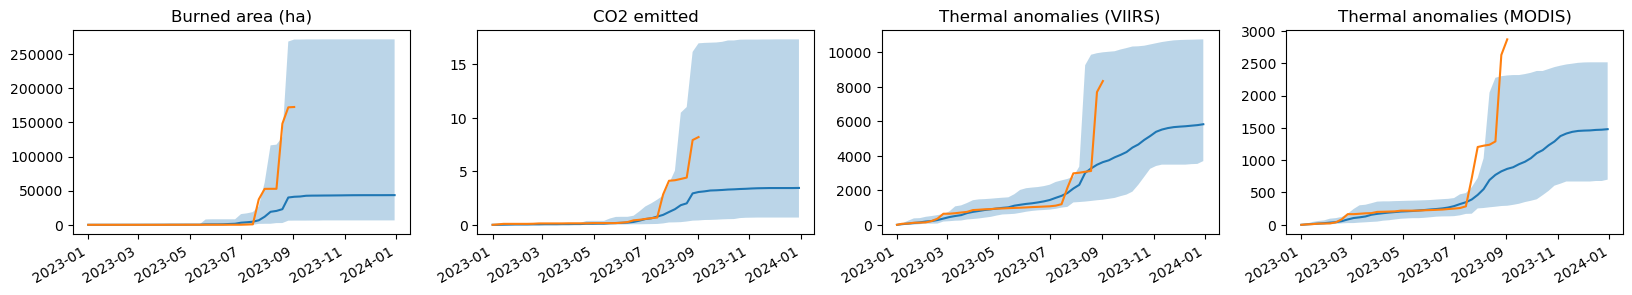

In [117]:
# plot EFFIS data
fig, axs = plt.subplots(ncols = 4, figsize = (20,3), dpi = 100)

for i in range(4):
    df = [ba, emi, tav, tam][i]
    ttl = ["Burned area (ha)", "CO2 emitted", "Thermal anomalies (VIIRS)", "Thermal anomalies (MODIS)"][i]

    axs[i].fill_between(df.index, df["min"], df["max"], alpha = 0.3)
    df["mean"].plot(ax = axs[i])
    df["2023"].plot(ax = axs[i])
    axs[i].set_title(ttl)


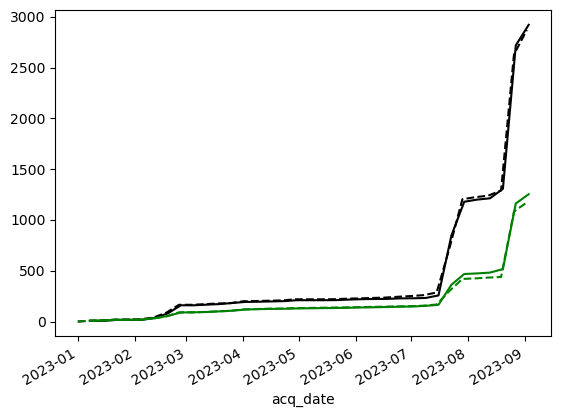

In [335]:
modis = pd.concat([pd.read_csv(fnm, parse_dates = ["acq_date"]) for fnm in glob.glob("data/modis_GRC_*.csv")])
modis = modis.loc[[d.year == 2023 for d in modis.acq_date]]

viirs = pd.concat([pd.read_csv(fnm, parse_dates = ["acq_date"]) for fnm in glob.glob("data/viirs_GRC_*.csv")])
viirs = viirs.loc[[d.year == 2023 for d in viirs.acq_date]]

modis_ba = modis.loc[modis.confidence >= 30, ["acq_date", "scan"]].resample("W", on = "acq_date", label = "right").count().cumsum()
viirs_ba = viirs.loc[[c in ["h", "n"] for c in viirs.confidence], ["acq_date", "scan"]].resample("W", on = "acq_date", label = "right").count().cumsum()

tam["2023"].plot(color = "k", ls = "--", label = "MODIS (EFFIS)")
modis_ba.plot(ax = plt.gca(), color = "k", label = "MODIS")

# VIIRS pixels are 375m - convert to actual area
(tav["2023"] * (375/1000)**2).plot(ax = plt.gca(), color = "green", ls = "--", label = "VIIRS (EFFIS)")
(viirs_ba * (375/1000)**2).plot(ax = plt.gca(), color = "green", label = "VIIRS")

plt.legend("", edgecolor = "w")

# **Fire weather**

## **KBDI**

In [113]:
from xclim.indices import keetch_byram_drought_index as kbdi

# load data (already masked to Greek land surface)
tmax = xr.open_dataset("data/era5_tmax_daily_eu_Greece_su.nc").tmax
pr = xr.open_dataset("data/era5_tp_daily_eu_Greece_su.nc").tp

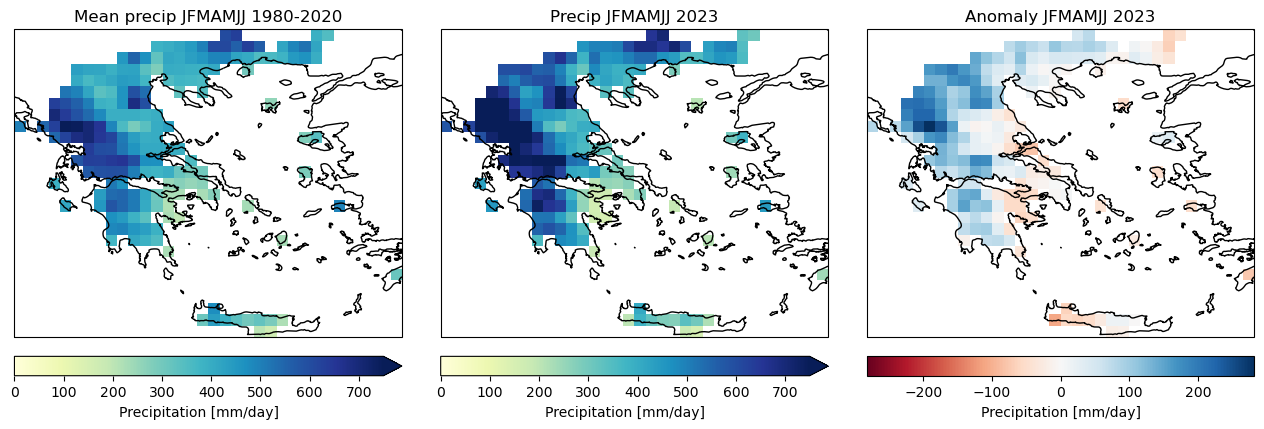

In [114]:
# precipitation anomaly 2023
pr_clim_td = pr.sel(time = [d <= 212 for d in pr.time.dt.dayofyear]).sel(time = slice("1980", "2020")).mean("time") * 212
pr_2023 = pr.sel(time = "2023").sum("time").where(pr_clim > 0)

fig, axs = plt.subplots(ncols = 3, figsize = (16,5), dpi = 100, subplot_kw = {"projection" : cproj})
plt.subplots_adjust(wspace = 0.1)

pr_kwargs = {"cmap" : "YlGnBu", "vmin" : 0, "vmax" : 750}
cbar_kwargs = {"location" : "bottom", "pad" : 0.05}

pr_clim_td.where(pr_clim_td > 0).plot(ax = axs[0], cbar_kwargs = cbar_kwargs, **pr_kwargs)
axs[0].set_title("Mean precip JFMAMJJ 1980-2020")

pr_2023.plot(ax = axs[1], cbar_kwargs = cbar_kwargs, **pr_kwargs)
axs[1].set_title("Precip JFMAMJJ 2023")

(pr_2023 - pr_clim_td).where(pr_clim > 0).plot(ax = axs[2], cbar_kwargs = cbar_kwargs, cmap = "RdBu")
axs[2].set_title("Anomaly JFMAMJJ 2023")

for ax in axs:
    ax.coastlines()

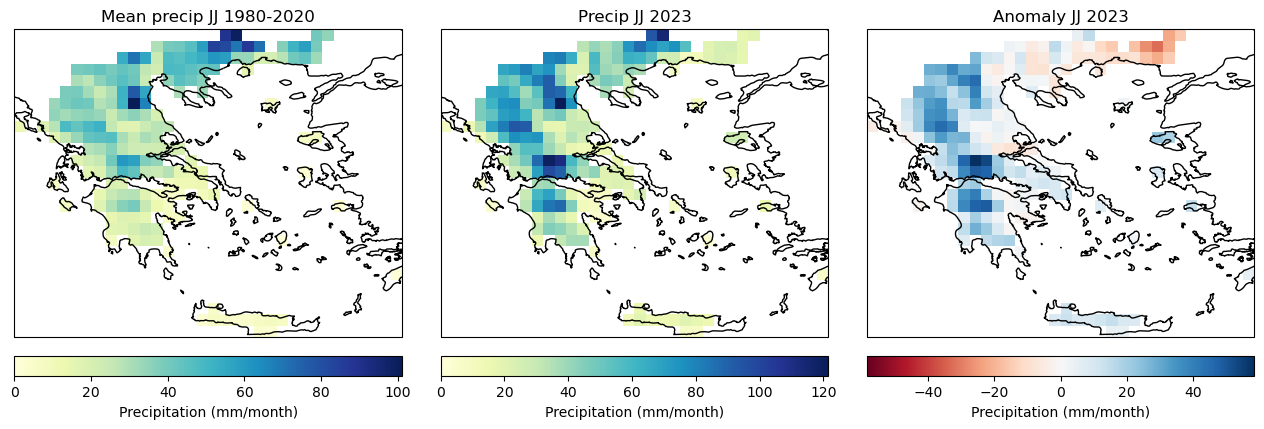

In [115]:
# precipitation anomaly 2023
pr_clim_td = pr.sel(time = [m in [6,7] for m in pr.time.dt.month]).resample(time = "MS").sum().sel(time = slice("1980", "2020")).mean("time")
pr_2023 = pr.sel(time = slice("2023-06", "2023-07")).resample(time = "MS").sum().mean("time").where(pr_clim > 0)

fig, axs = plt.subplots(ncols = 3, figsize = (16,5), dpi = 100, subplot_kw = {"projection" : cproj})
plt.subplots_adjust(wspace = 0.1)

pr_kwargs = {"cmap" : "YlGnBu", "vmin" : 0}
cbar_kwargs = {"location" : "bottom", "pad" : 0.05, "label" : "Precipitation (mm/month)"}

pr_clim_td.where(pr_clim_td > 0).plot(ax = axs[0], cbar_kwargs = cbar_kwargs, **pr_kwargs)
axs[0].set_title("Mean precip JJ 1980-2020")

pr_2023.plot(ax = axs[1], cbar_kwargs = cbar_kwargs, **pr_kwargs)
axs[1].set_title("Precip JJ 2023")

(pr_2023 - pr_clim_td).where(pr_clim > 0).plot(ax = axs[2], cbar_kwargs = cbar_kwargs, cmap = "RdBu")
axs[2].set_title("Anomaly JJ 2023")

for ax in axs:
    ax.coastlines()

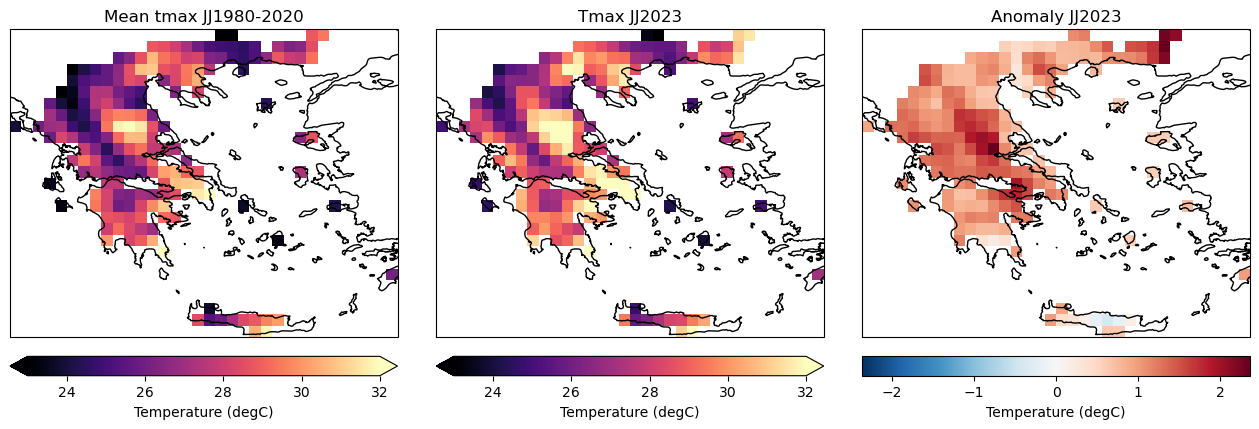

In [127]:
# temperature anomaly JJ2023
tmax_clim_td = tmax.sel(time = [m in [6,7] for m in pr.time.dt.month]).sel(time = slice("1980", "2020")).mean("time")
tmax_2023 = tmax.sel(time = slice("2023-06", "2023-07")).mean("time").where(pr_clim > 0)

fig, axs = plt.subplots(ncols = 3, figsize = (16,5), dpi = 100, subplot_kw = {"projection" : cproj})
plt.subplots_adjust(wspace = 0.1)

tmax_kwargs = {"cmap" : "magma", "vmin" : 23, "vmax" : 32}
cbar_kwargs = {"location" : "bottom", "pad" : 0.05, "label" : "Temperature (degC)"}

tmax_clim_td.where(tmax_clim_td > 0).plot(ax = axs[0], cbar_kwargs = cbar_kwargs, **tmax_kwargs)
axs[0].set_title("Mean tmax JJ1980-2020")

tmax_2023.plot(ax = axs[1], cbar_kwargs = cbar_kwargs, **tmax_kwargs)
axs[1].set_title("Tmax JJ2023")

(tmax_2023 - tmax_clim_td).where(pr_clim > 0).plot(ax = axs[2], cbar_kwargs = cbar_kwargs, cmap = "RdBu_r")
axs[2].set_title("Anomaly JJ2023")

for ax in axs:
    ax.coastlines()

In [116]:
pr_clim = pr.sel(time = slice("1980", "2020")).groupby("time.year").sum().mean("year")

kbdi_0 = xr.zeros_like(pr_clim)
for i in range(5):
    kbdi_0 = kbdi(pr = pr.sel(time = slice("1950", "1955")), tasmax = tmax.sel(time = slice("1950", "1955")), pr_annual = pr_clim, kbdi0 = kbdi_0).isel(time = -1)
    
kbdi_grc = kbdi(pr = pr, tasmax = tmax, pr_annual = pr_clim, kbdi0 = kbdi_0)

/home/clair/miniconda3/envs/wwa/lib/python3.10/site-packages/numba/np/ufunc/gufunc.py:170: RuntimeWarning: invalid value encountered in _keetch_byram_drought_index
  return self.ufunc(*args, **kwargs)


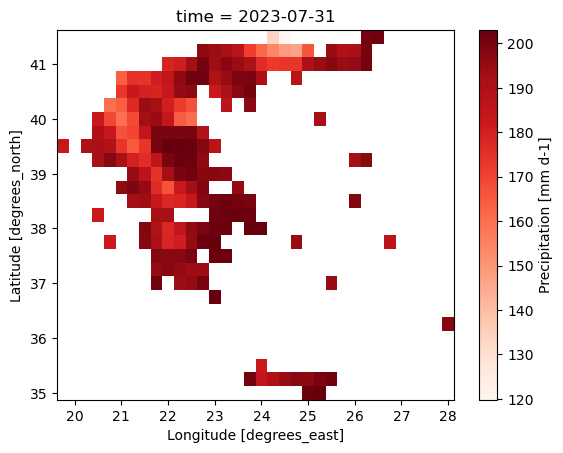

In [120]:
kbdi_grc.isel(time = -1).plot(cmap = "Reds")

In [146]:
modis = modis.clip([xn, yn, xx, yx])

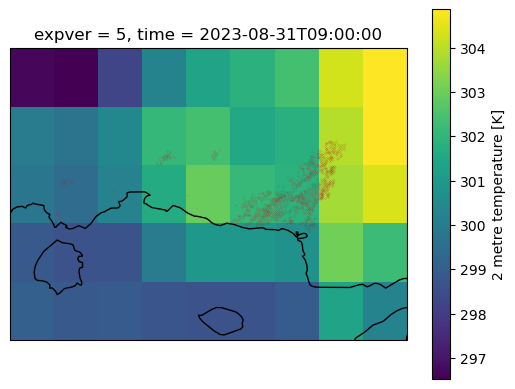

In [147]:
xr.open_dataset("data/era5_t2m-d2m_9utc_alexandropouli.nc").isel(time = -1, expver = 1).t2m.plot(subplot_kws = {"projection" : cproj})
ax = plt.gca()
modis.loc[(modis.y == 2023) & (modis.confidence >= 80)].plot(ax = ax, marker = ".", color = "firebrick", alpha = 0.7, markersize = 0.1)
ax.coastlines()

In [6]:
z500 = xr.open_dataset("../../Data/era5/era5_z500_daily_eu.nc").z500

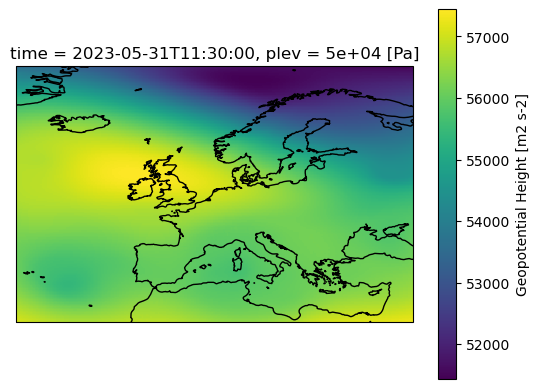

In [11]:
z500.isel(time = -1).plot(subplot_kws = {"projection" : cproj})
plt.gca().coastlines()

In [37]:
pr = xr.concat([xr.open_dataset(fnm).tp for fnm in glob.glob("data/era5_tp/*.nc")], "time").sortby("time")

In [39]:
pr.mean(["latitude", "longitude"]).groupby("time.month").mean()

<xarray.DataArray 'tp' (month: 9)>
array([1.18459880e-04, 1.11626396e-04, 9.73236965e-05, 8.48895361e-05,
       7.44662830e-05, 6.69460860e-05, 3.79053890e-05, 2.40950121e-05,
       1.41288823e-04], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 12
Attributes:
    units:      m
    long_name:  Total precipitation

In [3]:
z500 = xr.open_dataset("../../Data/era5/era5_z500_daily_eu.nc").z500.squeeze(drop = True)

z500_new = xr.open_dataset("../../Downloads/adaptor.mars.internal-1694086353.047515-22545-11-08139df7-ee3f-4048-9c78-13427a97f1e1.nc").z.sum("expver")
z500_new = z500_new.resample(time = "D").mean().rename(latitude = "lat", longitude = "lon")

z500 = xr.concat([z500, z500_new], "time")

In [ ]:
z500.sel(time = "2022").mean(["lat", "lon"]).plot()

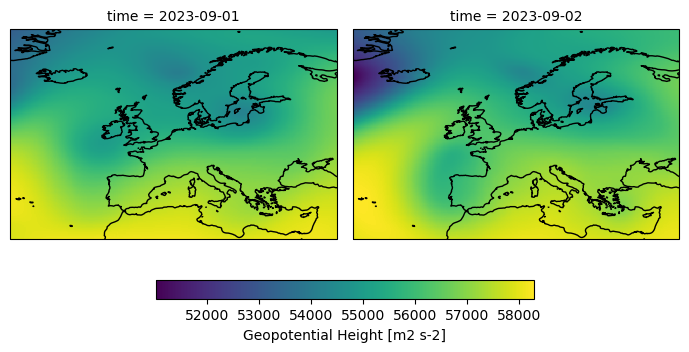

In [10]:
z500.sel(time = "2023-09").plot(col = "time", subplot_kws = {"projection" : cproj}, cbar_kwargs = {"location" : "bottom", "fraction" : 0.07})

for ax in plt.gcf().axes[:-1]: ax.coastlines()

In [11]:
z500

<xarray.DataArray 'z500' (time: 26908, lat: 181, lon: 281)>
array([[[52226.17 , 52238.684, 52250.67 , ..., 52713.83 , 52719.64 ,
         52725.31 ],
        [52289.54 , 52300.777, 52311.266, ..., 52687.84 , 52693.453,
         52698.746],
        [52345.56 , 52355.297, 52364.58 , ..., 52659.684, 52665.027,
         52670.14 ],
        ...,
        [56695.965, 56689.496, 56681.965, ..., 55769.047, 55763.734,
         55757.266],
        [56703.31 , 56696.89 , 56689.83 , ..., 55809.164, 55803.62 ,
         55797.414],
        [56711.484, 56704.92 , 56698.07 , ..., 55849.215, 55844.777,
         55838.62 ]],

       [[52650.934, 52655.64 , 52660.06 , ..., 52113.758, 52110.12 ,
         52106.496],
        [52667.215, 52671.996, 52676.383, ..., 52089.59 , 52085.477,
         52081.17 ],
        [52679.547, 52684.477, 52688.883, ..., 52062.402, 52057.914,
         52053.36 ],
...
        [57854.66 , 57863.973, 57872.63 , ..., 58077.22 , 58068.8  ,
         58060.375],
        [57853.285, 57862.66 , 57871.754, ..., 58085.27 , 58077.535,
         58068.574],
        [57851.223, 57860.63 , 57869.97 , ..., 58091.17 , 58085.016,
         58075.94 ]],

       [[53092.473, 53108.97 , 53125.547, ..., 55921.766, 55923.7  ,
         55925.527],
        [53063.8  , 53080.082, 53096.44 , ..., 55936.3  , 55938.78 ,
         55940.87 ],
        [53032.062, 53048.957, 53066.027, ..., 55947.31 , 55950.254,
         55953.   ],
        ...,
        [58027.438, 58037.36 , 58045.348, ..., 58083.84 , 58080.824,
         58077.254],
        [58015.73 , 58024.426, 58031.793, ..., 58089.37 , 58087.184,
         58082.793],
        [58002.547, 58009.723, 58016.25 , ..., 58093.7  , 58092.49 ,
         58087.223]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01T11:30:00 ... 2023-09-02
  * lon      (lon) float64 -30.0 -29.75 -29.5 -29.25 ... 39.25 39.5 39.75 40.0
  * lat      (lat) float64 75.0 74.75 74.5 74.25 74.0 ... 30.75 30.5 30.25 30.0
Attributes:
    standard_name:  geopotential_height
    long_name:      Geopotential Height
    units:          m2 s-2
    code:           129
    table:          128
    cell_methods:   time: mean